<a href="https://colab.research.google.com/github/MariaAma/1.Hotel_SQL_PowerBi/blob/main/Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **Importing the dataset**

In [194]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset['Gender'] = dataset['Gender'].map({'Female': 0, 'Male': 1})
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values


In [195]:
print("Independent column information",dataset.columns[1:-1])
print("Independent values\n",X)

Independent column information Index(['Gender', 'Age', 'Annual Income (k$)'], dtype='object')
Independent values
 [[  1  19  15]
 [  1  21  15]
 [  0  20  16]
 [  0  23  16]
 [  0  31  17]
 [  0  22  17]
 [  0  35  18]
 [  0  23  18]
 [  1  64  19]
 [  0  30  19]
 [  1  67  19]
 [  0  35  19]
 [  0  58  20]
 [  0  24  20]
 [  1  37  20]
 [  1  22  20]
 [  0  35  21]
 [  1  20  21]
 [  1  52  23]
 [  0  35  23]
 [  1  35  24]
 [  1  25  24]
 [  0  46  25]
 [  1  31  25]
 [  0  54  28]
 [  1  29  28]
 [  0  45  28]
 [  1  35  28]
 [  0  40  29]
 [  0  23  29]
 [  1  60  30]
 [  0  21  30]
 [  1  53  33]
 [  1  18  33]
 [  0  49  33]
 [  0  21  33]
 [  0  42  34]
 [  0  30  34]
 [  0  36  37]
 [  0  20  37]
 [  0  65  38]
 [  1  24  38]
 [  1  48  39]
 [  0  31  39]
 [  0  49  39]
 [  0  24  39]
 [  0  50  40]
 [  0  27  40]
 [  0  29  40]
 [  0  31  40]
 [  0  49  42]
 [  1  33  42]
 [  0  31  43]
 [  1  59  43]
 [  0  50  43]
 [  1  47  43]
 [  0  51  44]
 [  1  69  44]
 [  0  27  46]
 

In [196]:
print("Descriptive statistics",dataset.describe())

Descriptive statistics        CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.440000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    0.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


# **Scatter plots**

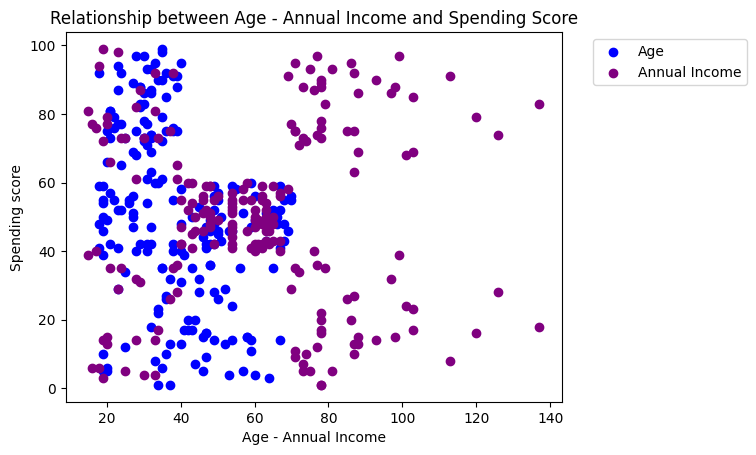

In [197]:
plt.scatter(X[:,1], y, color = 'blue', label='Age')
plt.scatter(X[:,2], y, color = 'purple', label='Annual Income')
plt.title('Relationship between Age - Annual Income and Spending Score')
plt.xlabel('Age - Annual Income')
plt.ylabel('Spending score')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# **Splitting the dataset into the Training set and Test set**

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# **Training the Multiple Linear Regression model on the Training set**

In [199]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# **Intercept and coefficient**


In [200]:
print(regressor.intercept_)
print(regressor.coef_)

71.75975314856893
[-4.08 -0.49 -0.02]


# **Predicting the Test set results**

In [201]:
y_pred = regressor.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis =1))

[[41.6  29.  ]
 [46.03 13.  ]
 [39.7  46.  ]
 [42.69 42.  ]
 [52.39 69.  ]
 [42.83 15.  ]
 [60.56 76.  ]
 [42.33 36.  ]
 [42.8  15.  ]
 [48.35 20.  ]
 [57.29 55.  ]
 [54.92 77.  ]
 [51.36 32.  ]
 [46.88 16.  ]
 [38.43 51.  ]
 [60.05 94.  ]
 [58.08 92.  ]
 [42.96  9.  ]
 [56.24 73.  ]
 [37.45 47.  ]
 [55.26 88.  ]
 [52.15 97.  ]
 [59.07 65.  ]
 [55.23 73.  ]
 [32.23 56.  ]
 [46.93 91.  ]
 [48.35 90.  ]
 [50.67 97.  ]
 [50.52 58.  ]
 [46.79 28.  ]
 [54.08 35.  ]
 [43.6  41.  ]
 [44.76 17.  ]
 [60.98 54.  ]
 [48.58  5.  ]
 [51.71 85.  ]
 [47.38 75.  ]
 [56.14 40.  ]
 [47.92 44.  ]
 [37.89 50.  ]]


# **Scatter plot with Regression model**

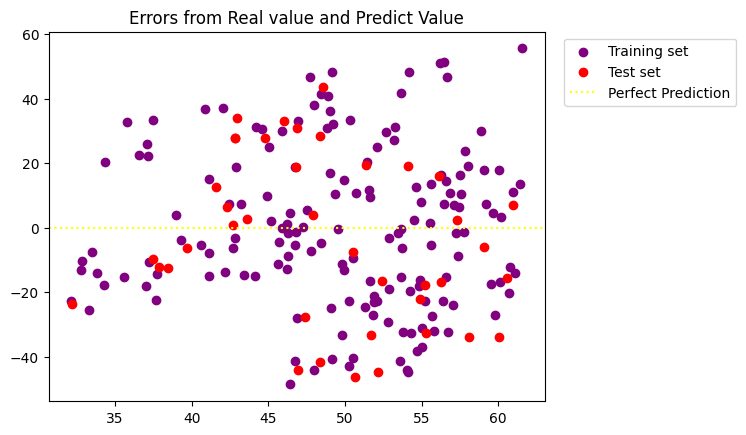

In [202]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, color = 'purple', label = 'Training set')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, color = 'red', label = 'Test set')
plt.axhline(y = 0, color = 'yellow', linestyle = ':', label = 'Perfect Prediction')
plt.title('Errors from Real value and Predict Value')
plt.legend(bbox_to_anchor=(1.40, 1))
plt.show()

# **Checking for Overfitting or Underfitting the data**

In [203]:
print("Training set score: {:.4f}".format(regressor.score(X_train,y_train)))
print("Test set score: {:.4f}".format(regressor.score(X_test,y_test)))

Training set score: 0.0841
Test set score: 0.1545


I find Training set score as0.0841 and Test set score as 0.5789.
Both scores is very poor, the model performs poorly on the training data, so we have Underfitting.
The linear regression model does not provide good fit to the data.